In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [12]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
y_train[0]

5

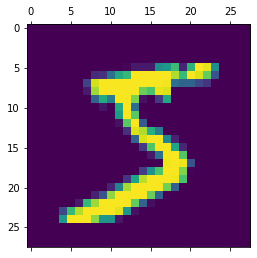

In [14]:
plt.matshow(x_train[0])

In [15]:
x_train=x_train/255
x_test=x_test/255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [18]:
x_train_flattened.shape

(60000, 784)

In [20]:
#A simple neural network with no hidden layer
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4950 - accuracy: 0.8755
Epoch 2/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3062 - accuracy: 0.9161
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2854 - accuracy: 0.9205
Epoch 4/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2746 - accuracy: 0.9233
Epoch 5/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2673 - accuracy: 0.9267


In [21]:
model.evaluate(x_test_flattened,y_test)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.2658 - accuracy: 0.9268


[0.2657846035152674, 0.9268]

In [26]:
y_predicted=model.predict(x_test_flattened)

In [27]:
y_predicted[0]

array([1.3461326e-05, 1.0786486e-10, 3.0810013e-05, 1.4321473e-02,
       1.3380375e-06, 6.9639551e-05, 1.0469573e-09, 7.8248042e-01,
       1.0061398e-04, 7.6109078e-04], dtype=float32)

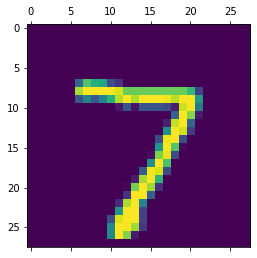

In [28]:
plt.matshow(x_test[0])

In [30]:
y_predicted[0]

array([1.3461326e-05, 1.0786486e-10, 3.0810013e-05, 1.4321473e-02,
       1.3380375e-06, 6.9639551e-05, 1.0469573e-09, 7.8248042e-01,
       1.0061398e-04, 7.6109078e-04], dtype=float32)

In [29]:
np.argmax(y_predicted[0])

7

In [32]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [33]:
#creating confusion matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    4,    5,    2,    3,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   6,    8,  920,   16,    8,    4,   11,   12,   45,    2],
       [   3,    0,   15,  935,    0,   15,    2,   12,   21,    7],
       [   1,    1,    3,    1,  918,    0,   10,    4,   11,   33],
       [   9,    3,    4,   44,    8,  768,   10,    8,   32,    6],
       [  11,    3,    7,    1,    8,   12,  910,    2,    4,    0],
       [   1,    7,   21,    7,    8,    0,    0,  953,    1,   30],
       [   4,    7,    6,   27,    9,   21,    7,   12,  876,    5],
       [   9,    7,    2,   13,   27,    5,    0,   24,    8,  914]])>

Text(69.0, 0.5, 'Truth')

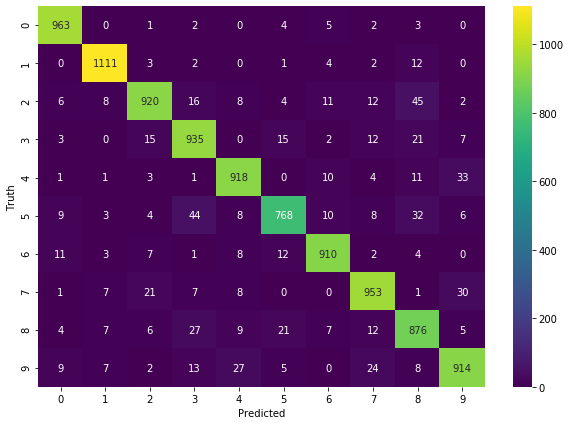

In [36]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d',cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
#Adding hidden layer
model = keras.Sequential([
    keras.layers.Dense(500, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2202 - accuracy: 0.9357
Epoch 2/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0884 - accuracy: 0.9739
Epoch 3/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0585 - accuracy: 0.9818
Epoch 4/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0437 - accuracy: 0.9862
Epoch 5/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0308 - accuracy: 0.9901


In [39]:
model.evaluate(x_test_flattened,y_test)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.0724 - accuracy: 0.9787


[0.07242792434412985, 0.9787]

In [44]:
#Testing the model with different loss function and optimizer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(10, activation='relu')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 73us/sample - loss: 3.4037 - accuracy: 0.1145
Epoch 2/5
60000/60000 [==============================] - 4s 61us/sample - loss: 2.2770 - accuracy: 0.0992
Epoch 3/5
60000/60000 [==============================] - 4s 60us/sample - loss: 2.3026 - accuracy: 0.0992
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 2.3026 - accuracy: 0.0992
Epoch 5/5
60000/60000 [==============================] - 5s 81us/sample - loss: 2.3026 - accuracy: 0.0992


In [45]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 54us/sample - loss: 2.3026 - accuracy: 0.1009


[2.3025814933776854, 0.1009]

Text(69.0, 0.5, 'Truth')

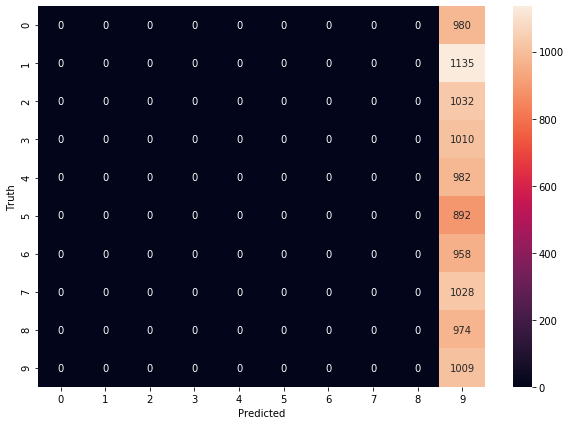

In [47]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
#Testing the model with different loss function and optimizer
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,), activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(10, activation='relu')
])

model.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 2.1895 - accuracy: 0.1787
Epoch 2/10
60000/60000 [==============================] - 6s 94us/sample - loss: 2.1547 - accuracy: 0.1640
Epoch 3/10
60000/60000 [==============================] - 7s 109us/sample - loss: 2.1406 - accuracy: 0.1701
Epoch 4/10
60000/60000 [==============================] - 6s 104us/sample - loss: 2.0799 - accuracy: 0.1961
Epoch 5/10
60000/60000 [==============================] - 5s 85us/sample - loss: 2.0668 - accuracy: 0.2014
Epoch 6/10
60000/60000 [==============================] - 6s 98us/sample - loss: 2.0097 - accuracy: 0.2231
Epoch 7/10
60000/60000 [==============================] - 6s 94us/sample - loss: 2.0188 - accuracy: 0.2222
Epoch 8/10
60000/60000 [==============================] - 6s 96us/sample - loss: 2.0047 - accuracy: 0.2253
Epoch 9/10
60000/60000 [==============================] - 6s 94us/sample - loss: 1.9906 - accuracy: 0.2318
Epoch 10/10
